
    1 Load and display the petrol data? or other stuff.
    2 Set the month and year as index, petrol and dizel differnce.
    3 separate data from 2023 and 2024
    4 Visualise data
    5 What insights can be drawn from the price difference trends across the two years?
    0 to exit
    : 4


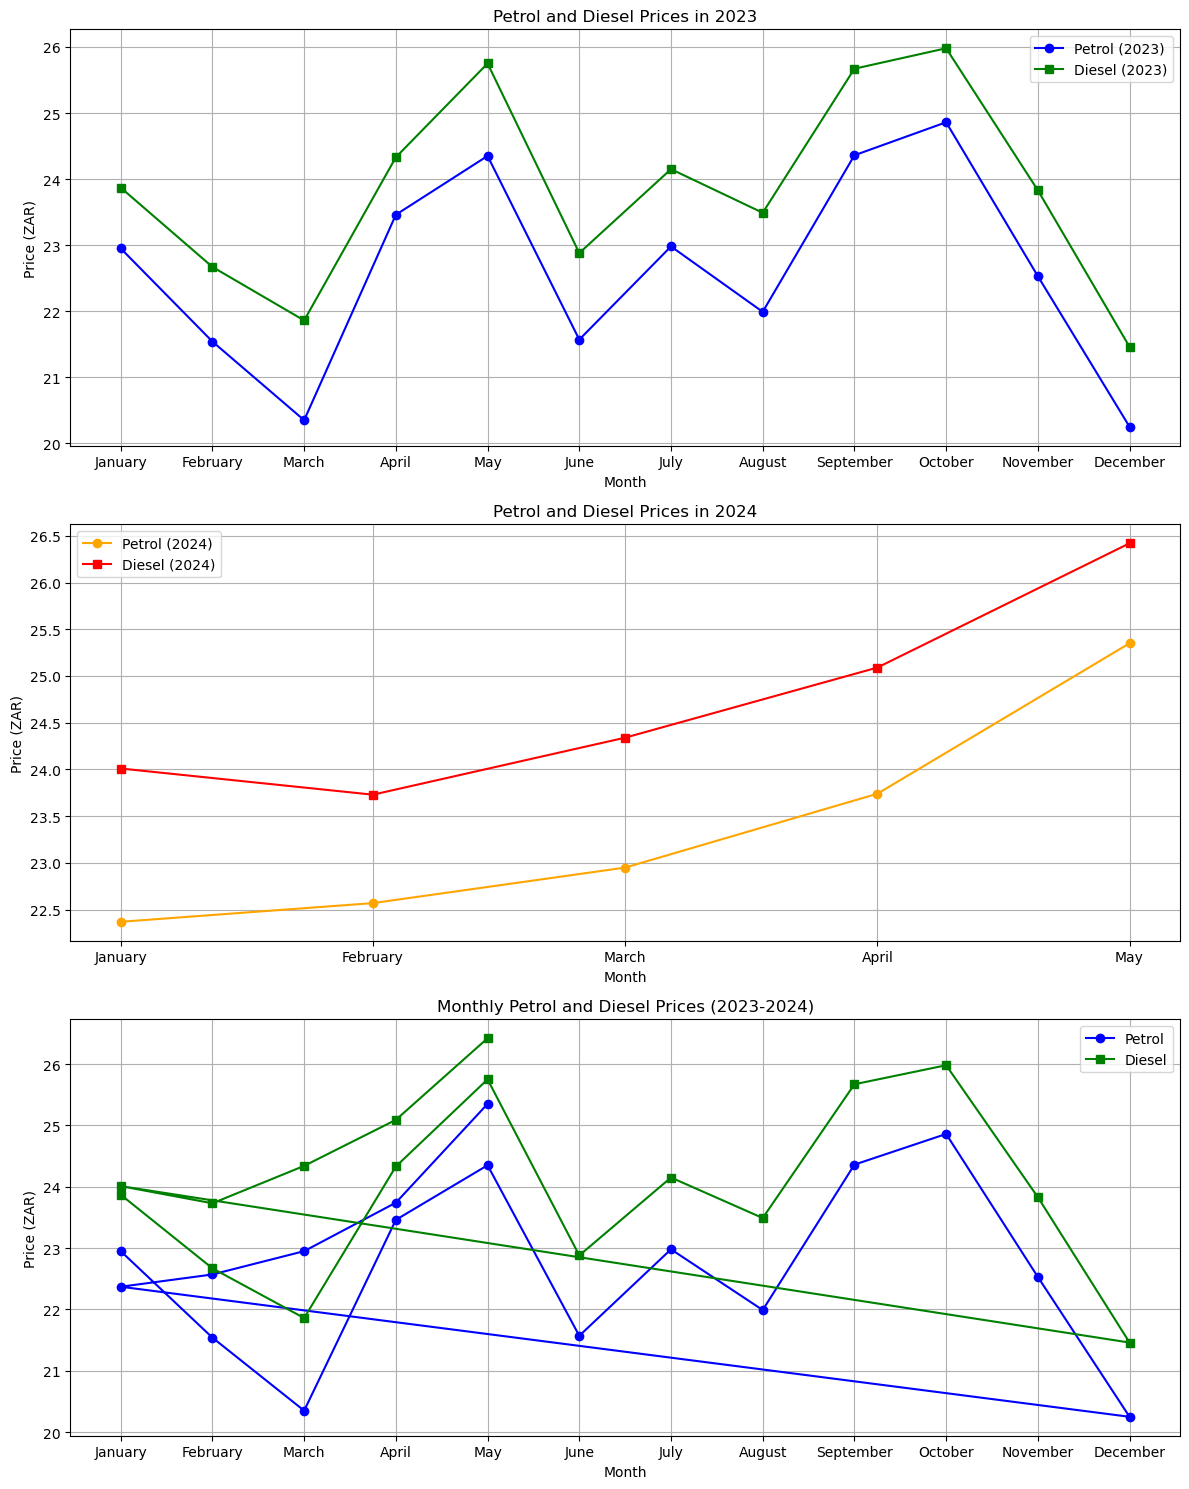

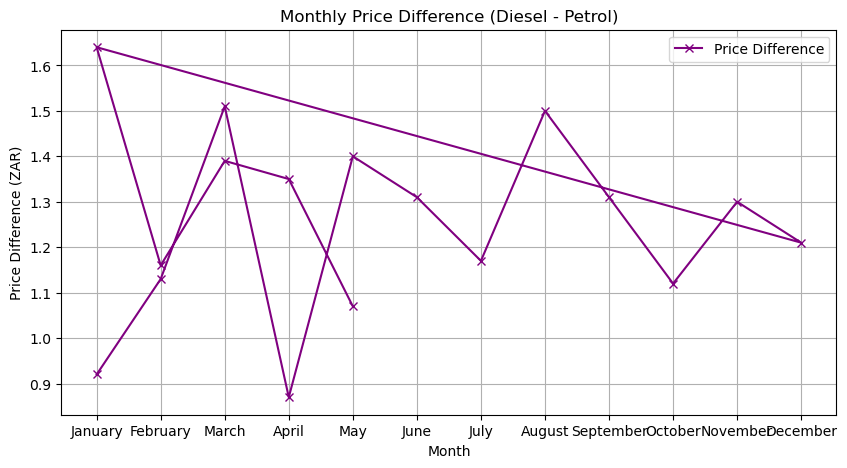

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def clear_console():
    """Clears the console screen based on the operating system."""
    if os.name == 'nt':  # For Windows
        os.system('cls')
    else:  # For macOS and Linux
        os.system('clear')
"""
The fluctuation of petrol and diesel prices poses significant financial challenges for working individuals. 
In South Africa, where transport costs form a considerable part of the household budget, monitoring fuel price changes is critical
#Question 1.1
"""
#filepath definition
file_path = 'petrolprices.csv'
getting = 0

#data loading
"""
1.Data Loading and Initial Display
a.Load the petrolprices.csv file into a Pandas dataframe. (1 Mark)
b.Display the first few rows to confirm successful import. (1 Mark)
"""
def dataFile_Display (file_path):
   
    df = pd.read_csv(file_path)
    print(df.head())
    
    clear_console()
    askUser ()
    return df
    
    
"""
2.Data Preprocessing Done
a.Set the Year and Month columns as the index of the dataframe. (3 Marks)
b.Create a new column called 'Price Difference' that stores the difference between diesel and petrol prices for each month. (5 Marks)"""
def dataPreprocess (file_path):
    # Load the dataset
    df = pd.read_csv("petrolprices.csv", delimiter=";", engine="python")
# Set 'Year' and 'Month' as the index
    df.set_index(['Year', 'Month'], inplace=True)
# Create a new column 'Price Difference'
    df['Price Difference'] = df['Diesel'] - df['Petrol']   
# Display the processed DataFrame
    print(df.head())
    return df
    askUser ()

"""
3.Year-wise Data Segmentation Done
Create two new dataframes:
a.One containing only data for the year 2023 (3 Marks)
b.One containing only data for the year 2024(3 Marks)"""
def dataSegmentation(file_path):
    # Load the dataset
    df = pd.read_csv(file_path, delimiter=";", engine="python")
    # Set 'Year' and 'Month' as the index
    df.set_index(['Year', 'Month'], inplace=True)
    # Create a DataFrame for 2023
    df_2023 = df.loc[2023]
    # Create a DataFrame for 2024
    df_2024 = df.loc[2024]
    # Display the first few rows of each DataFrame
    print("2023 Data:")
    print(df_2023.head())
    print("\n2024 Data:")
    print(df_2024.head())

    return df_2023, df_2024

"""
4.Data Visualisation
a.Plot individual line charts showing the petrol and diesel prices for each year (2023 and 2024) separately.(2 Marks)
b.Plot a combined line chart that shows the monthly trend in both petrol and diesel prices from January 2023 to December 2024.(3 Marks)
c.Plot a separate line chart showing the monthly 'Price Difference'.(2 Marks)"""

def visualize_fuel_prices(file_path):
    # Load the dataset
    df = pd.read_csv(file_path, delimiter=";", engine="python")

    # Set 'Year' and 'Month' as the index
    df.set_index(['Year', 'Month'], inplace=True)

    # Remove rows with zero values
    df = df[(df['Petrol'] > 0) & (df['Diesel'] > 0)]

    # Price Difference
    df['Price Difference'] = df['Diesel'] - df['Petrol']

    # Separate DataFrames for 2023 and 2024
    df_2023 = df.loc[2023]
    df_2024 = df.loc[2024]

    # Create subplots for better clarity
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    # Plot petrol and diesel prices for 2023
    axs[0].plot(df_2023.index, df_2023['Petrol'], label="Petrol (2023)", marker="o", color='blue')
    axs[0].plot(df_2023.index, df_2023['Diesel'], label="Diesel (2023)", marker="s", color='green')
    axs[0].set_title("Petrol and Diesel Prices in 2023")
    axs[0].set_xlabel("Month")
    axs[0].set_ylabel("Price (ZAR)")
    axs[0].legend()
    axs[0].grid()

    # Plot petrol and diesel prices for 2024
    axs[1].plot(df_2024.index, df_2024['Petrol'], label="Petrol (2024)", marker="o", color='orange')
    axs[1].plot(df_2024.index, df_2024['Diesel'], label="Diesel (2024)", marker="s", color='red')
    axs[1].set_title("Petrol and Diesel Prices in 2024")
    axs[1].set_xlabel("Month")
    axs[1].set_ylabel("Price (ZAR)")
    axs[1].legend()
    axs[1].grid()

    # Plot combined petrol and diesel prices from January 2023 to December 2024
    axs[2].plot(df.index.get_level_values('Month'), df['Petrol'], label="Petrol", marker="o", color='blue')
    axs[2].plot(df.index.get_level_values('Month'), df['Diesel'], label="Diesel", marker="s", color='green')
    #axs[2].plot(df.index, df['Petrol'], label="Petrol (2023)", marker="o", color='blue')
    axs[2].set_title("Monthly Petrol and Diesel Prices (2023-2024)")
    axs[2].set_xlabel("Month")
    axs[2].set_ylabel("Price (ZAR)")
    axs[2].legend()
    axs[2].grid()

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()

    # Separate plot for price difference
    plt.figure(figsize=(10, 5))
    plt.plot(df.index.get_level_values('Month'), df['Price Difference'], label="Price Difference", marker="x", color='purple')
    plt.title("Monthly Price Difference (Diesel - Petrol)")
    plt.xlabel("Month")
    plt.ylabel("Price Difference (ZAR)")
    plt.legend()
    plt.grid()
    plt.show()
    plt.tight_layout()
    askUser()

def askUser ():
    
    getting = 0
    getting = input("""
    1 Load and display the petrol data? or other stuff.
    2 Set the month and year as index, petrol and dizel differnce.
    3 separate data from 2023 and 2024
    4 Visualise data
    5 What insights can be drawn from the price difference trends across the two years?
    0 to exit
    :""")

    match getting:
        case "1":
            dataFile_Display(file_path)
            clear_console()
        case "2":
            dataPreprocess (file_path)
        case "3":
            dataSegmentation(file_path)
        case "4":
            visualize_fuel_prices(file_path)
        case "5":
            print("C")
        case "0":
            exit()
            
    
askUser()
   

#stops here




# User
i want the console to clear after a prompt

# Assistant
# Clearing the Console in Jupyter Notebook

To clear the console output in Jupyter Notebook after a prompt, you can use the `clear_output` function from the IPython.display module. This is useful when you want to create cleaner interactive applications or reduce clutter in your notebook.

Here's how you can implement this:


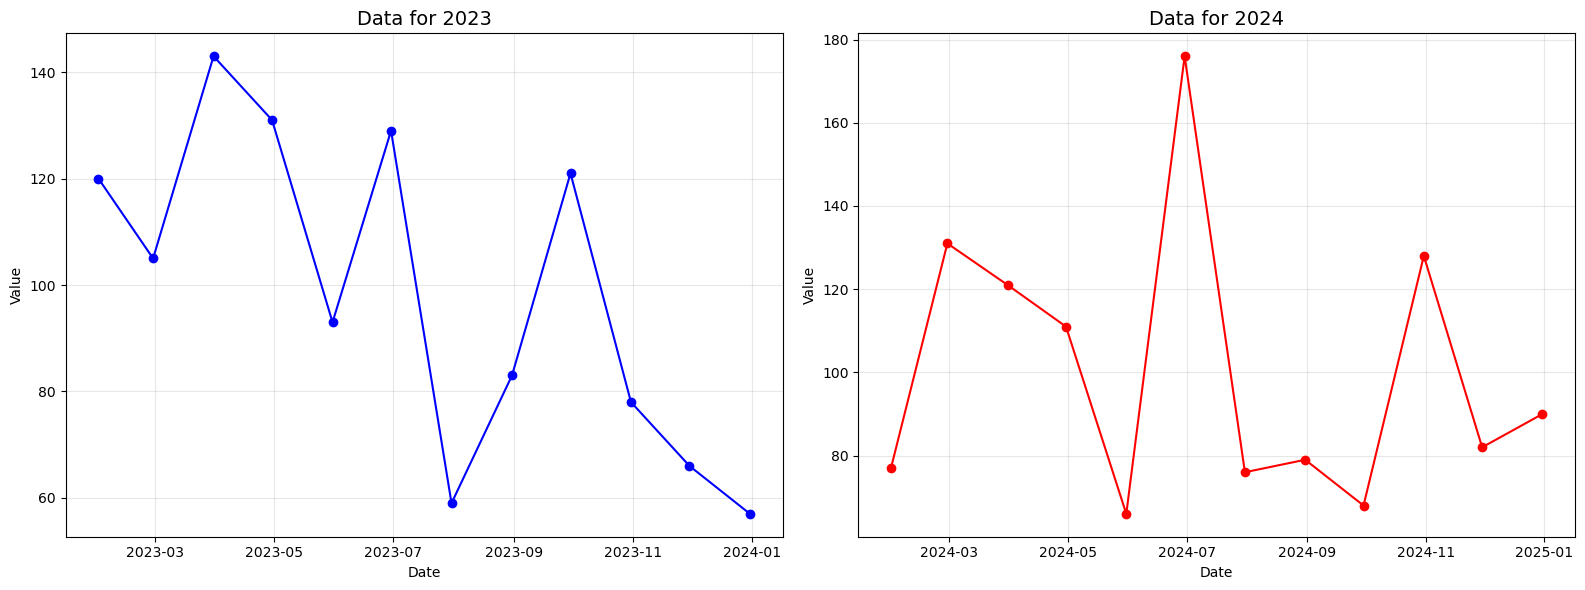

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data - replace this with your actual data
# Creating example data for demonstration
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')

values_2023 = np.random.randint(50, 150, size=len(dates_2023))
values_2024 = np.random.randint(60, 180, size=len(dates_2024))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2023 data on the left subplot
ax1.plot(dates_2023, values_2023, 'b-', marker='o')
ax1.set_title('Data for 2023', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)

# Plot 2024 data on the right subplot
ax2.plot(dates_2024, values_2024, 'r-', marker='o')
ax2.set_title('Data for 2024', fontsize=14)
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()


## Key points about `clear_output`:

- The `wait=True` parameter is important - it waits until new output is available before clearing, which prevents flickering
- This works in Jupyter Notebook and JupyterLab environments
- You can place this in a loop to create interactive applications that update in-place

## Alternative packages:

If you're working in different environments:

1. **os** package - For terminal-based Python scripts (not Jupyter):
   - `os.system('cls')` (Windows)
   - `os.system('clear')` (Mac/Linux)

2. **time** package - Can be combined with clear_output for timed refreshes

3. **ipywidgets** - For more sophisticated interactive applications in Jupyter

The IPython.display approach is the most reliable for Jupyter environments specifically.

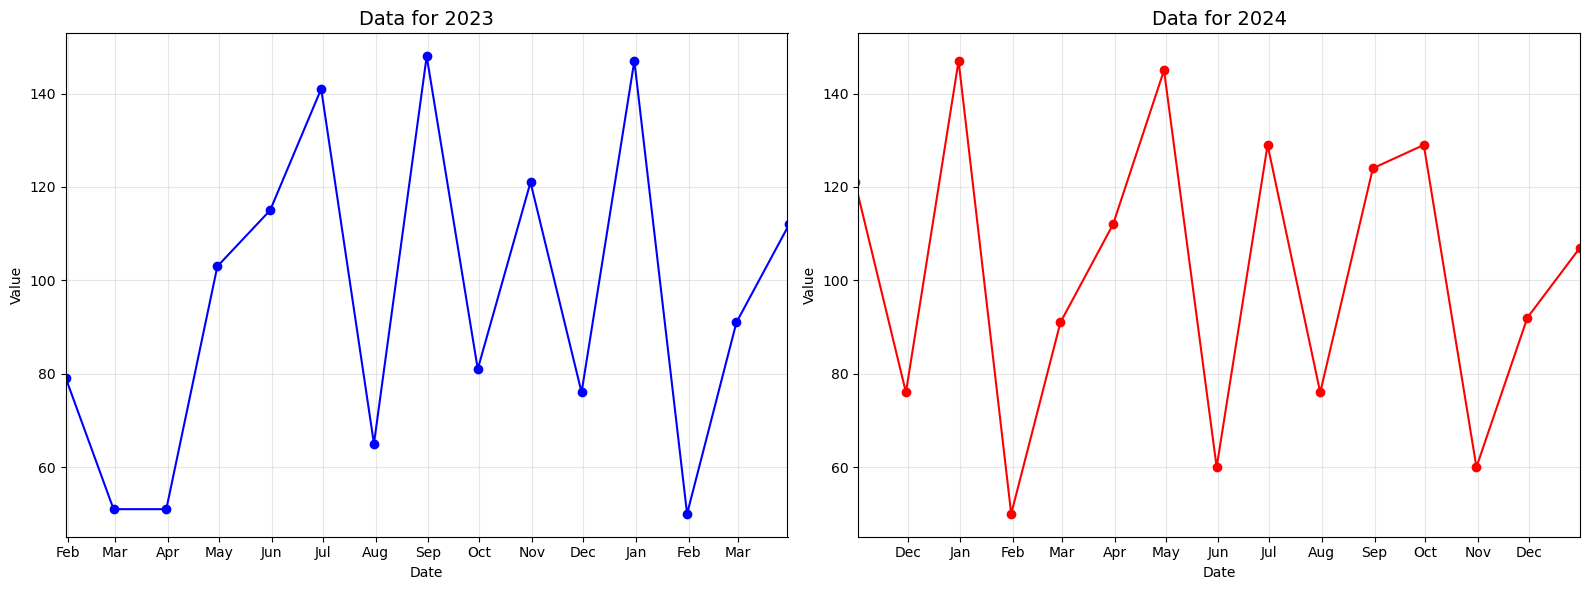

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Create a continuous timeline from 2023-2024
dates_full = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
values_full = np.random.randint(50, 150, size=len(dates_full))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Filter data for each year
dates_2023 = dates_full[dates_full.year == 2023]
dates_2024 = dates_full[dates_full.year == 2024]
values_2023 = values_full[:len(dates_2023)]
values_2024 = values_full[len(dates_2023):]

# Plot 2023 data on the left subplot
# Extend the line beyond December by including the first few months of 2024
ax1.plot(dates_full, values_full, 'b-', marker='o')
ax1.set_title('Data for 2023', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)

# Set x-axis limits to show only 2023 (but the line continues beyond)
ax1.set_xlim([dates_2023[0], dates_2023[-1] + pd.Timedelta(days=90)])  # Show a bit of 2024

# Format x-axis to show months
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Plot 2024 data on the right subplot
ax2.plot(dates_full, values_full, 'r-', marker='o')
ax2.set_title('Data for 2024', fontsize=14)
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.grid(True, alpha=0.3)

# Set x-axis limits to show only 2024 (but the line continues from 2023)
ax2.set_xlim([dates_2024[0] - pd.Timedelta(days=90), dates_2024[-1]])  # Show a bit of 2023

# Format x-axis to show months
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

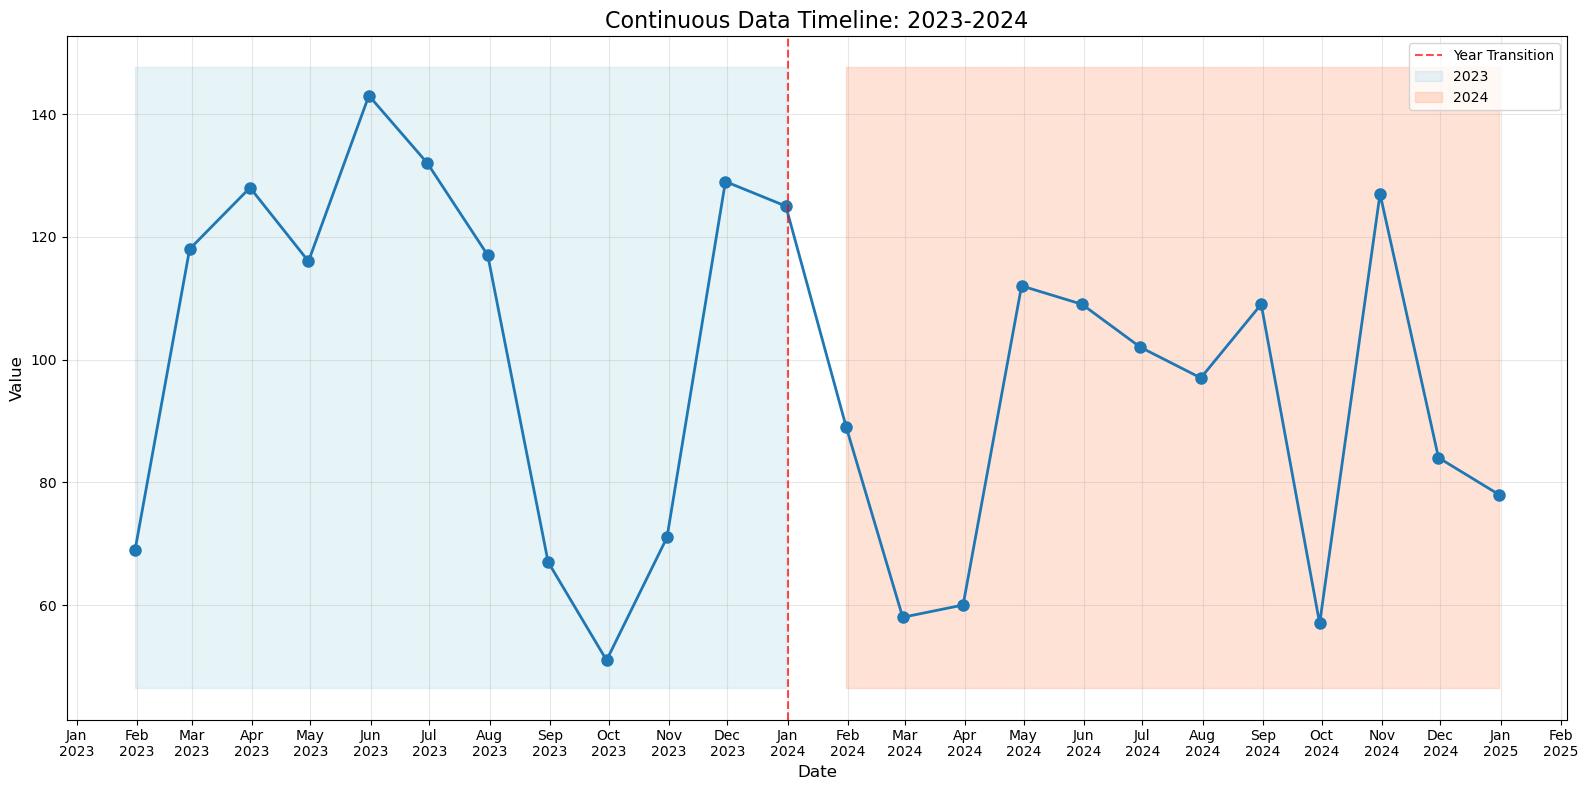

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Create a continuous timeline from 2023-2024
dates_full = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
values_full = np.random.randint(50, 150, size=len(dates_full))

# Create a figure with a single plot
plt.figure(figsize=(16, 8))

# Plot the full timeline
plt.plot(dates_full, values_full, marker='o', linewidth=2, markersize=8)

# Add a vertical line to mark the transition from 2023 to 2024
transition_date = pd.Timestamp('2024-01-01')
plt.axvline(x=transition_date, color='red', linestyle='--', alpha=0.7, 
            label='Year Transition')

# Highlight the different years with background shading
min_y, max_y = plt.ylim()
plt.fill_between(dates_full, min_y, max_y, 
                 where=[d.year == 2023 for d in dates_full],
                 color='lightblue', alpha=0.3, label='2023')
plt.fill_between(dates_full, min_y, max_y, 
                 where=[d.year == 2024 for d in dates_full],
                 color='lightsalmon', alpha=0.3, label='2024')

# Customize the plot
plt.title('Continuous Data Timeline: 2023-2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the x-axis to show months and years clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.xticks(rotation=0)

# Add legend
plt.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()